In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import lib.data_management as dm

In [3]:
  from lib2.IQPulseSequence import *

In [4]:
if_freq = 50e6

calibrations = (dm.load_IQMX_calibration_database("TEST", -6))
ro_cal = calibrations.get(frozenset(dict(lo_power=0, ssb_power=-30, lo_frequency=7.047e9, 
                                      if_frequency=0, waveform_resolution=1).items()))
ro_pb = PulseBuilder(ro_cal)

calibrations = (dm.load_IQMX_calibration_database("TESTQ", -6))
q_cal = calibrations.get(frozenset(dict(lo_power=15, ssb_power=-10, lo_frequency=7.9e9+if_freq, 
                                      if_frequency=if_freq, waveform_resolution=0.1).items()))
q_pb = PulseBuilder(q_cal)

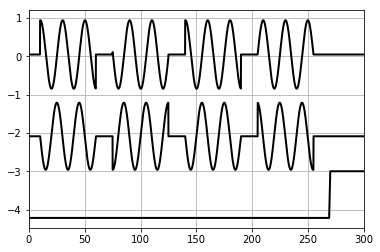

In [31]:
sequence_parameters = {"awg_trigger_reaction_delay":0, "readout_duration":1000, "excitation_amplitude":1, "pi_pulse_duration":50,
                       "half_pi_pulse_duration":50, "ramsey_delay":50, "echo_delay":100, "readout_delay":100, "ramsey_angle":0.1,
                            "repetition_period":2000, "excitation_duration":80, "modulating_window":"rectangular",
                      'pseudo_I_pulses_count':1, "padding":15}
q_seq, ro_seq = PulseBuilder.build_dispersive_APE_sequences(q_pb.add_zero_pulse(10), ro_pb.add_zero_pulse(10), sequence_parameters)
ro_I, ro_Q = ro_seq.get_IQ_sequences()
q_I, q_Q = q_seq.get_IQ_sequences()
q_I.plot(q_seq.get_duration(), lw=2, color="black")
q_Q._waveform -= 1/2.5
q_Q.plot(q_seq.get_duration(), lw=2, color="black")

ro_Q._waveform *= 3
ro_Q._waveform -= 2/2.5
ro_Q.plot(ro_seq.get_duration(), lw=2, color="black")
plt.xlim(0,300)
# plt.grid()
plt.savefig("tmp.pdf")
plt.grid()